In [198]:
# Importing the basic libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

iris=pd.read_csv("iris.csv")
iris=iris.loc[:,['SepalLengthCm','SepalWidthCm','Species']]
iris.head()

FileNotFoundError: [Errno 2] File iris.csv does not exist: 'iris.csv'

In [184]:
X=iris.drop(columns="Species")
y=iris["Species"]

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=45)

In [186]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=40)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

In [187]:
tree.get_depth()

10

In [188]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.95 0.6333333333333333


In [189]:
path=tree.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']

In [190]:
len(alphas)

18

In [191]:
alphas.min(),alphas.max()

(0.0, 0.2075694444444443)

In [192]:
accuracy_train,accuracy_test=[],[]

for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

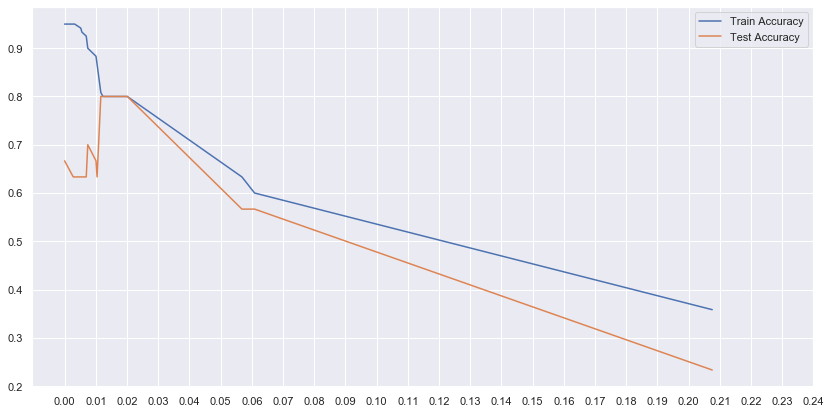

In [195]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [197]:
tree = DecisionTreeClassifier(ccp_alpha=0.02,random_state=40)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.8 0.8
